## Most Convenient Pittsburgh Neighborhood

# Intro:

Our project is an analysis of the most convenient neighborhood (“best”) in Pittsburgh using real data from Western Pennsylvania Regional Data Center (WPRDC). Other data we considered includes arrest rates, crime reports, dog licenses obtained, and the grade of the land for ideas; once we drew connections between the different data sets, it became clear that the best approach was to gauge convenience in terms of proximity to supermarkets and convenience stores, public wifi access, and Port Authority punctuality.

# Metrics:

The data sets we are using to analyze convenience include Supermarkets and Convenience Stores, Public Wi-fi, and Port Authority Punctuality. Due to the diversity of housing and inter-neighborhood proximity, we are measuring the amount of supermarkets and convenience stores, the amount of locations with public Wi-Fi access, and the overall average punctuality of Port Authority buses within the confines of each neighborhood.


# Submetric Groceries and Convenience Store Locations 

Why this metric:
We chose this metric because an important aspect of convenience is access to food: how far you have to go for it, the quality of it, etc. 

In [2]:
import pandas as pd

stores = pd.read_csv("Grocery-data.tsv", sep='\t')

stores.head()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store


,Store Count
Zip Codes,
15237.0,28
15146.0,22
15222.0,21
15132.0,19
15108.0,19
15210.0,18
15213.0,17
15136.0,17
15212.0,17


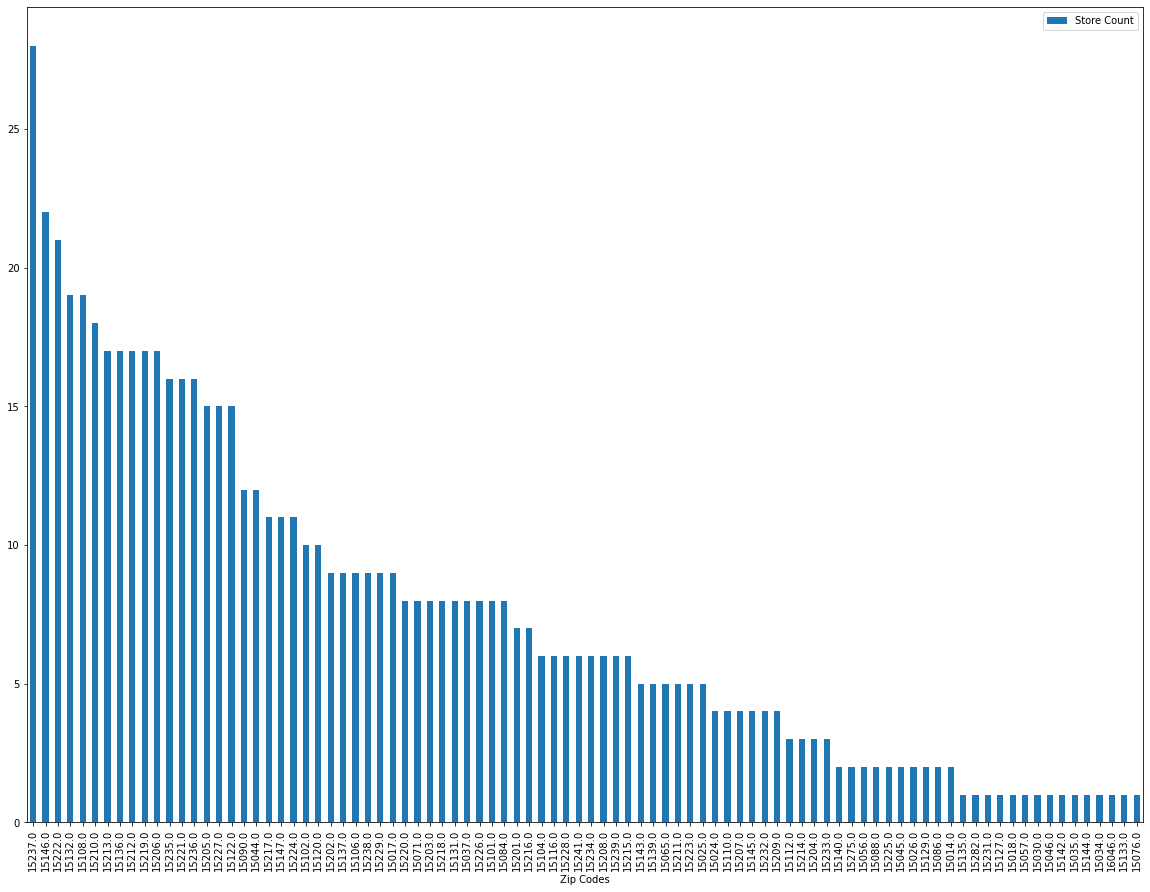

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt




codes = pd.read_csv("Grocery-data.tsv", sep="\t")
unique= codes['Zip'].value_counts().rename_axis('Zip Codes').to_frame(name='Store Count')

#data = unique.value_counts().rename_axis('Zip Codes').to_frame(name='Store Count')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


#print(data)

unique.plot.bar(figsize=(20, 15))

unique.head(10)

In conclusion, McKnight, The Strip District, and Monroville are the most convenient by this metric at 28, 22, and 21 respectively.

# Submetric Bus Accuracy
This metric was chosen because most people use the bus as their primary means of transportation in cities, and even those who only occasionally use it can have their days ruined by a late (or early) bus. It's best to know to what degree buses in one's neighborhood (and the neighborhood of their workplace), so that they can arrive places on time.

In [6]:
# making sure everything is imported (and not forgotten later)
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#turning tsv file into data frame
bus_accuracy = pd.read_csv('Bus_Accuracy.tsv', delimiter='\t')
#example
bus_accuracy.head()

,route,ridership_route_code,route_full_name,current_garage,mode,month_start,year_month,day_type,on_time_percent,data_source
0,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,WEEKDAY,0.6837,Clever
1,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,SAT.,0.6977,Clever
2,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,SUN.,0.6280,Clever
3,2,002,2 - MOUNT ROYAL,Ross,Bus,2017-01-01,201701,WEEKDAY,0.6978,Clever
4,4,004,4 - TROY HILL,Ross,Bus,2017-01-01,201701,WEEKDAY,0.7438,Clever


In [8]:
# list of dictionaries of what routes are in what neighborhoods
neighborhood = [
    {"name": "Allegheny Center", "codes": ["001", "008", "012", "013", "016", "017", "018", "019L", "021", "022", "023", "024", "025", "027", "029", "P1", "P2", "P3", "P7"]},
    {"name": "Allegheny West", "codes": ["001", "008", "012", "013", "016", "017", "018", "019L", "021", "022", "023", "024", "025", "027", "029", "P1", "P2", "P3", "P7"]},
    {"name": "Allentown", "codes": ["041", "043", "044U", "048", "051", "054", "Y1"]},
    {"name": "Arlington", "codes": ["051", "053L", "054"]},
    {"name": "Arlington Heights", "codes": ["044U", "048", "051"]},
    {"name": "Banksville", "codes": ["031", "038", "Y1", "Y46"]},
    {"name": "Bedford Dwellings", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "Beechview", "codes": ["039", "041", "042", "Y1", "Y45"]},
    {"name": "Beltzhoover", "codes": ["040", "041", "044U", "048"]},
    {"name": "Bloomfield", "codes": ["054", "064", "086", "087", "088", "089", "P1", "P2", "P3"]},
    {"name": "Bluff", "codes": ["051L", "053L", "056", "058", "093", "099", "P1", "P2", "P3"]},
    {"name": "Bon Air", "codes": ["044U", "048"]},
    {"name": "Brighton Heights", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12"]},
    {"name": "Brookline", "codes": ["036", "039", "041", "044U", "Y45"]},
    {"name": "California-Kirkbride", "codes": ["001", "008", "013", "015", "016", "017", "018", "019L", "021", "022", "023", "024", "025", "027", "P1", "P2", "P3", "P7"]},
    {"name": "Carrick", "codes": ["044U", "045", "046", "Y1", "Y45"]},
    {"name": "CentralBusinessDistrict", "codes": ["001", "002", "004", "006", "007", "008", "011", "012", "013", "014", "015", "016", "017", "018", "019L", "020", "021", "022", "024", "026", "027", "028X", "029", "031", "036", "038", "039", "040", "041", "043", "044U", "048", "051", "052L", "053L", "054", "056", "057", "058", "059", "061A", "061B", "061C", "064", "065", "067", "068", "069", "071A", "071B", "071C", "071D", "074", "075", "077", "P1", "P2", "P3", "P7", "Y1", "Y45"]},
    {"name": "CentralLawrenceville", "codes": ["054", "064", "086", "087", "088", "089", "P1", "P2", "P3"]},
    {"name": "Central Northside", "codes":["001", "006", "008", "013", "016", "017", "018", "054", "P7"]},
    {"name": "Central Oakland", "codes": ["028X", "058", "059", "061A", "061B", "061C", "061D", "067", "069"]},
    {"name": "ChartiersCity", "codes": ["020", "031", "0O1", "O12"]},
    {"name": "Chateau", "codes": ["001", "008", "012", "013", "016", "017", "018", "019L", "021", "022", "023", "024", "025", "027", "P1", "P2", "P3", "P7"]},
    {"name": "CraftonHeights", "codes": ["020", "036", "038", "0O1"]},
    {"name": "CrawfordRoberts", "codes": ["081", "083", "086", "087", "088", "089", "P1", "P2", "P3"]},
    {"name": "DuquesneHeights", "codes": ["020", "Y1", "Y46", "038"]},
    {"name": "EastAllegheny", "codes": ["001", "011", "016", "017", "018", "019L", "054", "P1", "P2", "P3", "P7"]},
    {"name": "EastCarnegie", "codes": ["036", "O01", "031", "0O1"]},
    {"name": "EastHills", "codes": ["074", "079", "086", "087", "089"]},
    {"name": "EastLiberty", "codes": ["071A", "071B", "071C", "071D", "074", "075", "077", "081", "082", "086", "087", "089", "P1", "P2", "P3"]},
    {"name": "Elliott", "codes": ["020", "031"]},
    {"name": "Esplen", "codes": ["020", "O1"]},
    {"name": "Fairywood", "codes": ["020", "0O1"]},
    {"name": "Fineview", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12"]},
    {"name": "Friendship", "codes": ["054", "086", "087", "088", "089"]},
    {"name": "Garfield", "codes": ["086", "087", "088", "089", "091", "093"]},
    {"name": "GlenHazel", "codes": ["059", "093"]},
    {"name": "Greenfield", "codes": ["052L", "093", "Y1", "Y45"]},
    {"name": "Hays", "codes": ["059"]},
    {"name": "Hazelwood", "codes": ["053L", "056", "057", "093"]},
    {"name": "HighlandPark", "codes": ["071A", "071B", "071C", "071D", "074", "075", "077", "086", "087", "089"]},
    {"name": "HomewoodNorth", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "HomewoodSouth", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "HomewoodWest", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "Knoxville", "codes": ["040", "041", "044U", "048", "051"]},
    {"name": "Larimer", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "LincolnLemingtonBelmar", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "Lincoln Place", "codes": ["055", "056", "057"]},
    {"name": "LowerLawrenceville", "codes": ["054", "086", "087", "088", "089"]},
    {"name": "Manchester", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12", "P1", "P2", "P3", "P7"]},
    {"name": "MarshallShadeland", "codes": ["001", "015", "016", "017", "018", "019L", "020", "024", "027", "O12", "P1", "P2", "P3", "P7"]},
    {"name": "MiddleHill", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "Morningside", "codes": ["071B", "075"]},
    {"name": "MtOliver", "codes": ["051", "053L"]},
    {"name": "MtWashington", "codes": ["038", "Y1", "Y45"]},
    {"name": "NewHomestead", "codes": ["059"]},
    {"name": "NorthOakland", "codes": ["028X", "054", "075", "071A", "071B", "071C", "071D", "082", "P1", "P2", "P3"]},
    {"name": "NorthPointBreeze", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "NorthShore", "codes": ["001", "011", "016", "017", "018", "019L", "054", "P1", "P2", "P3", "P7"]},
    {"name": "NorthviewHeights", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12", "P1", "P2", "P3", "P7"]},
    {"name": "Oakwood", "codes": ["051", "053L"]},
    {"name": "Overbrook", "codes": ["039", "040", "041", "044U", "048"]},
    {"name": "PerryNorth", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12", "P1", "P2", "P3", "P7"]},
    {"name": "PerrySouth", "codes": ["044U", "048"]},
    {"name": "PointBreeze", "codes": ["061A", "061B", "069", "071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "PolishHill", "codes": ["054", "086", "087", "088", "089"]},
    {"name": "Regent Square", "codes": ["061A", "061B", "067", "069", "P68"]},    
    {"name": "Ridgemont", "codes": ["G2"]},    
    {"name": "Saint Clair", "codes": ["048", "048A", "051", "051L"]},    
    {"name": "Shadyside", "codes": ["071A", "071B", "071C", "071D", "075", "077", "082", "P1", "P3"]},    
    {"name": "Sheraden", "codes": ["001", "016", "017", "018", "020", "024", "027", "28X", "051", "P7"]},    
    {"name": "South Oakland", "codes": ["058", "059", "061A", "061B", "061C", "061D", "067", "069", "P3", "P10"]},    
    {"name": "South Shore", "codes": []},    
    {"name": "South Side Flats", "codes": ["048", "051", "051L", "052L", "054", "Y1", "Y45"]},
    {"name": "South Side Slopes", "codes": ["048", "051", "051L", "052L", "053", "054", "056", "057", "Y1", "Y45"]},
    {"name": "Spring Garden", "codes": ["001", "016", "017", "018", "019L", "500", "054", "P12"]},
    {"name": "Spring Hill Cityview", "codes": ["001", "016", "017", "018", "019L", "500", "054", "P12"]},
    {"name": "Squirrel Hill North", "codes": ["061A", "061B", "061C", "064", "065", "067", "069", "071B", "074", "075", "077", "082", "086", "093"]},
    {"name": "Squirrel Hill South", "codes": ["061A", "061B", "061C", "064", "065", "067", "069", "071B", "074", "075", "077", "082", "086", "093"]},
    {"name": "StantonHeights", "codes": ["075", "086", "087", "089"]},
    {"name": "StripDistrict", "codes": ["054", "086", "087", "088", "089"]},
    {"name": "SummerHill", "codes": ["001", "002", "012", "013", "016", "017", "018", "019L", "500", "P1", "P2", "P3", "P7", "P68", "P71"]},
    {"name": "SwisshelmPark", "codes": ["061A", "061B", "061C", "064", "Y46"]},
    {"name": "TerraceVillage", "codes": ["056", "057", "058", "093"]},
    {"name": "TroyHill", "codes": ["001", "006A", "006B", "006C", "006D", "013", "016", "017", "018", "019L", "054", "088", "091", "093", "P1", "P2", "P3", "P7"]},
    {"name": "UpperHill", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "UpperLawrenceville", "codes": ["054", "064", "086", "087", "088", "089"]},
    {"name": "WestEnd", "codes": ["020", "031"]},
    {"name": "WestOakland", "codes": ["056", "057", "058", "093"]},
    {"name": "Westwood", "codes": ["020", "031", "038", "Y1", "Y46"]},
    {"name": "Windgap", "codes": ["020", "031"]}]

In [9]:
results = []
#iterating through each dictionary in list
for code_dict in neighborhood:
    name = code_dict['name']
    codes = code_dict['codes']
    # separating info
    df_filtered = bus_accuracy[bus_accuracy['ridership_route_code'].isin(codes)]
    #calculating mean
    mean = df_filtered['on_time_percent'].mean()
    results.append({"neighborhood": name, "accuracy": mean})
#turning data into a new data frame
fin = pd.DataFrame(results)

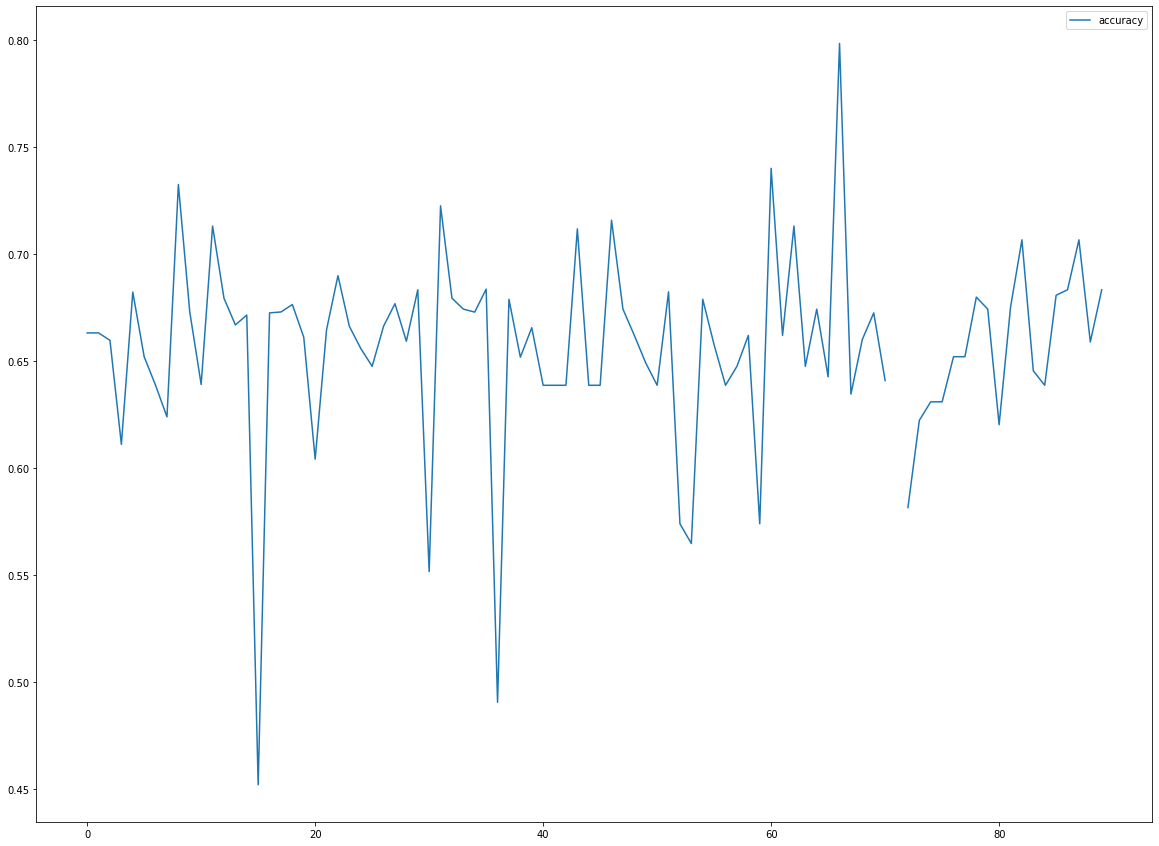

In [15]:
# creating a graph that displays the accuracy of each neighborhood (by their index in fin)
fin.plot.line(figsize=(20, 15))
plt.show()

In [13]:
# example of what the list looks like!
# add this to see full DF
# pd.set_option('display.max_rows', 90)
fin

,neighborhood,accuracy
0,Allegheny Center,0.663240
1,Allegheny West,0.663240
2,Allentown,0.659763
3,Arlington,0.611180
4,Arlington Heights,0.682314
5,Banksville,0.652101
6,Bedford Dwellings,0.638770
7,Beechview,0.624012
8,Beltzhoover,0.732562
9,Bloomfield,0.673025


The neighborhoods with the highest rate of accuracy are Ridgemont (79.85%), Overbrook (74.01%), and Beltzhoover (73.26%). As buses not being on time is inconvenient, this makes these the most convenient neighborhoods in terms of bus accuracy.

# Submetric Public Wifi Locations

Why this Metric:
This metric was chosen because as technology develops, access to Wi-Fi becomes increasingly important—even to the degree of being considered a necessity for some. Without easy access to the internet, people must spend more time and money accessing content that they need for work, school, and their personal lives

In [4]:
import pandas as pd

wifi = pd.read_csv("Wifi-data.tsv", sep='\t')

wifi.head()


,x,y,object_id,global_id,location_name,location_details,location_hours,ssid,password_required,password_details,account_required,account_details,street1,street2,city,state,zip,web_site,amenities_restroom,amenities_seating,amenities_vending,amenities_details,public_notes,location_type,id
0,-80.006667,40.456544,22,6adecc06-b03e-4d52-ae47-4557b39331de,Carnegie Library of Pittsburgh - Allegheny,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Allegheny,No,NaN,No,Requires click-through on captive portal to ac...,1230 Federal Street,NaN,Pittsburgh,PA,15212.0,https://www.carnegielibrary.org/clp_location/a...,yes,yes,no,Adjacent to Federal street restuarants and All...,NaN,Institutional,CLP_Allegheny
1,-80.027710,40.407046,23,28feaf52-49f3-4c12-aaed-c42fc1f1cfc3,Carnegie Library of Pittsburgh - Beechview,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Beechview,No,NaN,No,Requires click-through on captive portal to ac...,1910 Broadway Avenue,NaN,Pittsburgh,PA,15216.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,adjacent to Belasco T stop,NaN,Institutional,CLP_Beechview
2,-80.021397,40.394401,24,5e382f99-c41b-4837-aaad-b79cd4340a2b,Carnegie Library of Pittsburgh - Brookline,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Brookline,No,NaN,No,Requires click-through on captive portal to ac...,708 Brookline Boulevard,NaN,Pittsburgh,PA,15226.0,https://www.carnegielibrary.org/clp_location/b...,yes,yes,no,located in Brookline business district,NaN,Institutional,CLP_Brookline
3,-79.987547,40.397006,25,665e443b-3348-4d93-8a42-0bf860ee61f0,Carnegie Library of Pittsburgh - Carrick,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-Carrick,No,NaN,No,Requires click-through on captive portal to ac...,1811 Brownsville Road,NaN,Pittsburgh,PA,15210.0,https://www.carnegielibrary.org/clp_location/c...,yes,yes,no,street parking available,NaN,Institutional,CLP_Carrick
4,-79.926537,40.460938,27,f01d16aa-3717-4f3c-bf6a-81b507c167e6,Carnegie Library of Pittsburgh - East Liberty,In building and on sidewalk,"24 hours/day, 7 days/week",CLP-East Liberty,No,NaN,No,Requires click-through on captive portal to ac...,130 S. Whitfield Street,NaN,Pittsburgh,PA,15206.0,https://www.carnegielibrary.org/clp_location/e...,yes,yes,no,Parking lot behind library on Beatty Street,NaN,Institutional,CLP_East_Liberty


,Wifi Count
Zip Codes,
15104.0,18
15210.0,13
15219.0,9
15215.0,8
15203.0,6
15213.0,5
15235.0,5
15226.0,4
15216.0,4


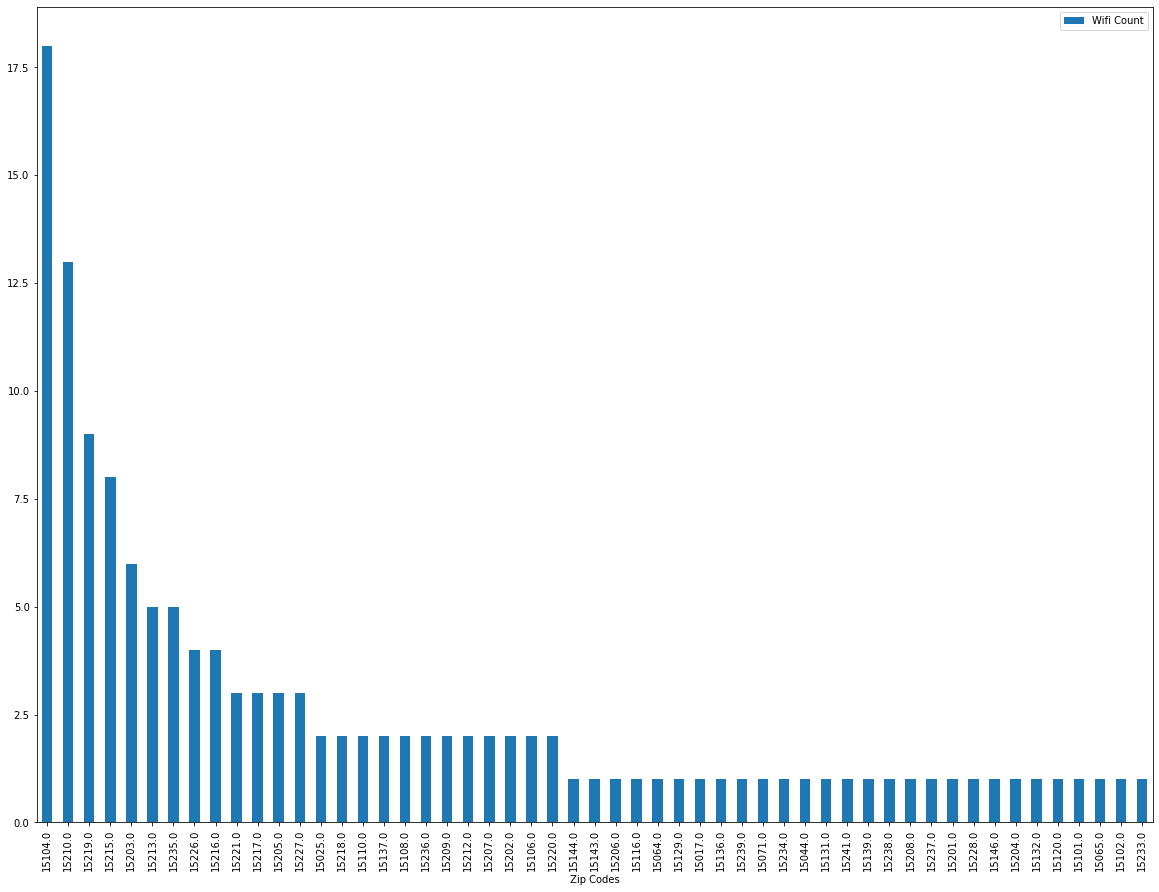

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt




codes = pd.read_csv("Wifi-data.tsv", sep="\t")
unique= codes['zip'].value_counts().rename_axis('Zip Codes').to_frame(name='Wifi Count')

#data = unique.value_counts().rename_axis('Zip Codes').to_frame(name='Store Count')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


#print(data)

unique.plot.bar(figsize=(20, 15))

unique.head(10)

The most convenient neighborhoods in terms of amount of public Wi-Fi access are Braddock (18 locations), Mt. Oliver(13), and The Central Business District(9).